In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme()
from pathlib import Path

In [2]:
exp_dir = Path(Path.home(), "Documents/xray/sample_bench/single_state/likelihood_weight")


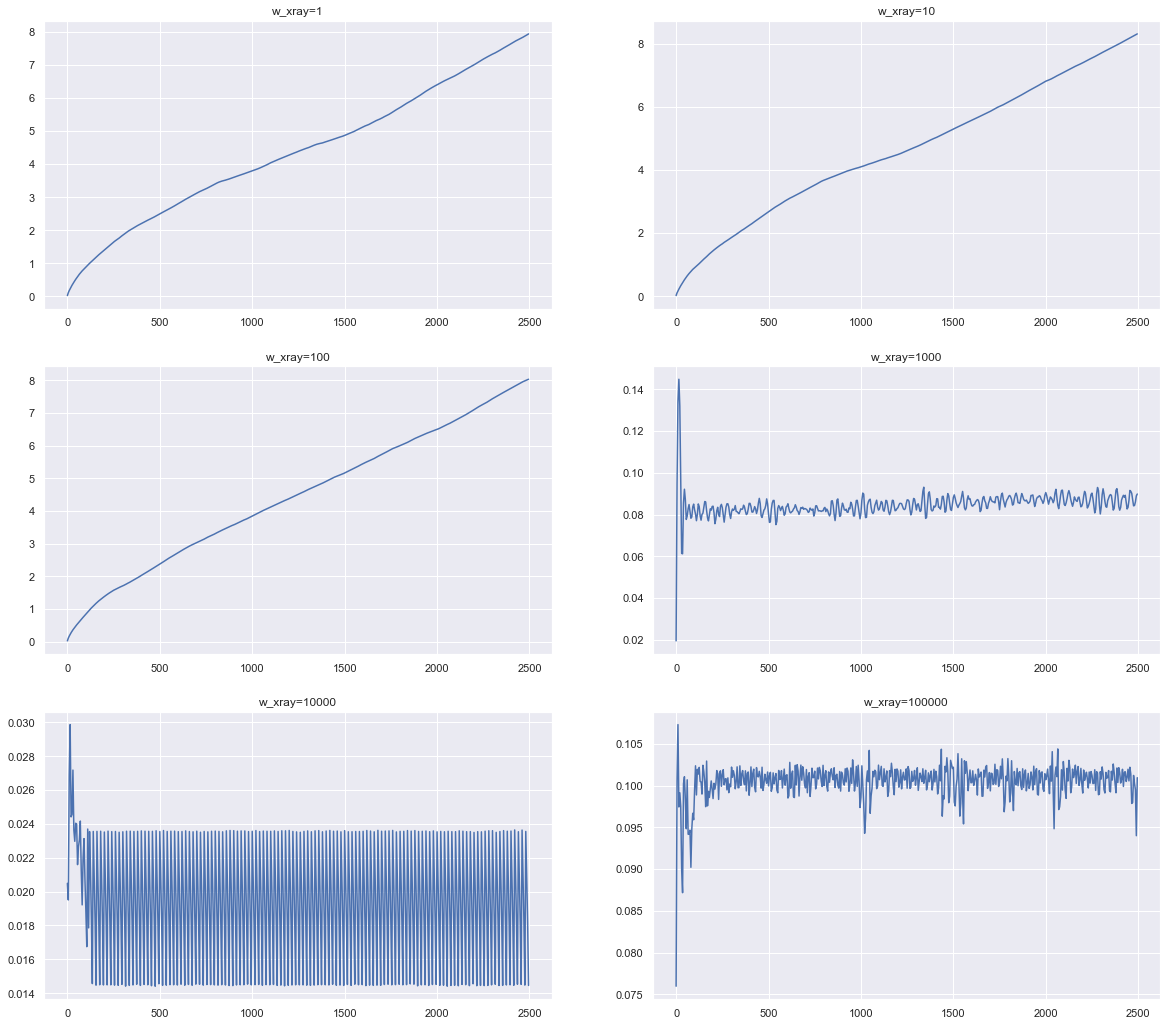

In [6]:
n_rows = 3 
n_cols = 2 
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20,6*n_rows))

n_output = 5 
freq = 5 
for i in range(n_output+1):
    if n_output > 2: 
        ax = axs[i//2][i%2]
    else: 
        ax = axs[i]
    
    ax.title.set_text("w_xray={}".format(10**i))

    job_dir = Path(exp_dir, "equil_single_state_noisy")
    output_dir = Path(job_dir, "output_{}".format(i))
    log_file = Path(output_dir, "log.csv")

    log_df = pd.read_csv(log_file)
        
    plot_x = list(log_df["step"])
    plot_y = list(log_df["RMSD"])
        
    ax.plot(plot_x[::freq], plot_y[::freq])

plot_file = Path(exp_dir, "figures/equil_single_state_noisy.png")
plt.savefig(plot_file)